<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/session_4_Normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[9, 11, 9, 9, 10]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

,count
2,0.0298
3,0.0878
4,0.1721
5,0.2843
6,0.4203
7,0.5913
8,0.7231
9,0.8345
10,0.9198
11,0.9748


<Axes: >

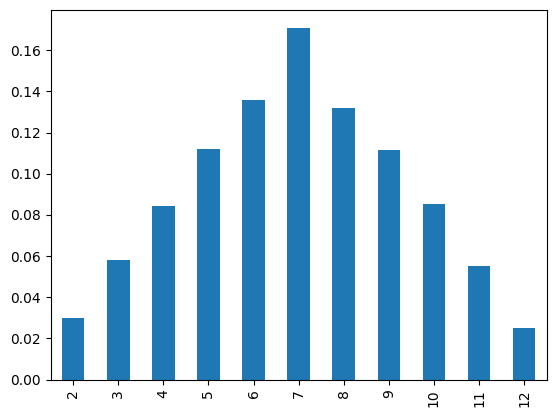

In [8]:
s.plot(kind='bar')

<Axes: >

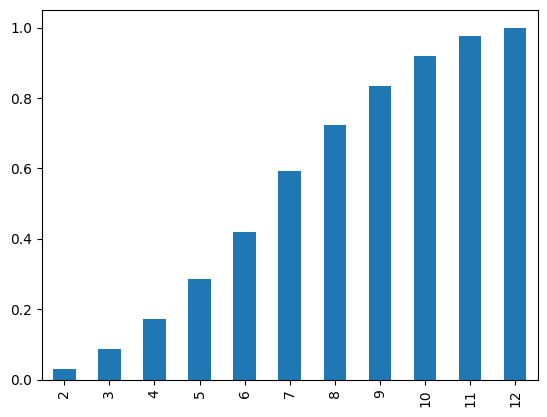

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [11]:
sample.mean()

np.float64(50.0931599994152)

(array([  7.,  21.,  70., 172., 217., 246., 157.,  78.,  29.,   3.]),
 array([34.40460927, 37.52343519, 40.64226112, 43.76108704, 46.87991296,
        49.99873888, 53.11756481, 56.23639073, 59.35521665, 62.47404258,
        65.5928685 ]),
 <BarContainer object of 10 artists>)

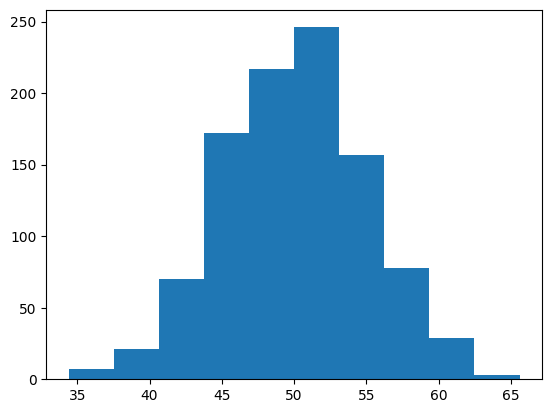

In [12]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [13]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [14]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [15]:
values = np.linspace(sample.min(),sample.max(),100)

In [16]:
sample.max()

np.float64(65.59286849868192)

In [17]:
probabilities = [dist.pdf(value) for value in values]

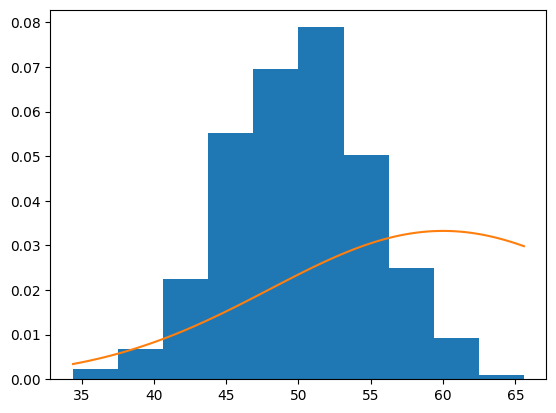

In [18]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

/tmp/ipython-input-1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

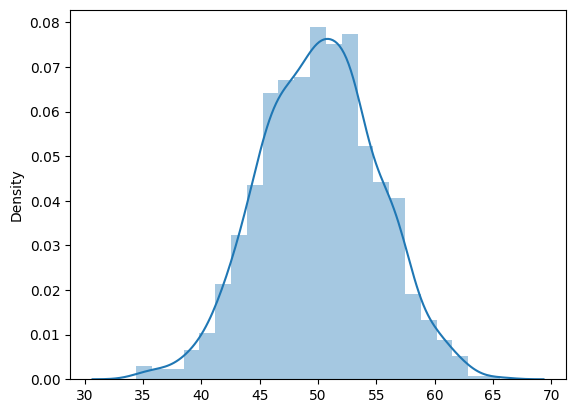

In [19]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [20]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [21]:
sample

array([20.88617367, 26.53154144, 20.18808421, 12.5296253 , 16.52285563,
       12.70318291, 15.5053039 , 23.88287855, 18.88285732, 17.91906355,
       28.63697351, 17.98999315, 25.34673443, 16.45793901, 19.04260785,
       20.85774115, 20.33710314, 17.05962595, 14.13340456, 18.79897412,
       16.37673033,  9.78485064, 19.74843401, 25.8661172 , 20.82068194,
       19.91301692, 19.11971646, 23.6246662 , 18.27855972, 24.09916286,
       32.75378282, 24.38440844, 24.64390621, 24.29546057, 22.38097939,
        7.39967412, 18.4118681 , 20.12427523, 11.03287885, 15.01194934,
       13.68387648, 13.8896246 , 15.70388894, 20.77469696, 19.73152382,
       25.84653715, 18.79218897, 18.38448379, 22.10402814, 25.30445711,
       17.56899299, 18.81527838, 18.98138499, 18.1822357 , 12.59298601,
       11.2448292 , 12.66863239, 20.8859028 , 31.45879477, 17.78347175,
       17.80892245, 26.80129883, 18.38788663,  9.09082365, 14.75067639,
       20.06357014, 24.94002233, 21.551817  ,  6.76618995, 16.08

(array([ 1.,  1.,  2.,  3.,  5.,  4.,  6., 11., 10., 15., 18., 14., 27.,
        23., 24., 25., 12., 16., 18., 22., 16.,  6., 11., 11., 11., 13.,
        21., 15., 31., 29., 29., 52., 50., 54., 51., 53., 49., 43., 42.,
        35., 45., 22., 21., 13.,  9.,  5.,  2.,  3.,  0.,  1.]),
 array([ 5.34192582,  6.33695664,  7.33198746,  8.32701827,  9.32204909,
        10.3170799 , 11.31211072, 12.30714154, 13.30217235, 14.29720317,
        15.29223398, 16.2872648 , 17.28229562, 18.27732643, 19.27235725,
        20.26738806, 21.26241888, 22.2574497 , 23.25248051, 24.24751133,
        25.24254214, 26.23757296, 27.23260378, 28.22763459, 29.22266541,
        30.21769622, 31.21272704, 32.20775786, 33.20278867, 34.19781949,
        35.1928503 , 36.18788112, 37.18291194, 38.17794275, 39.17297357,
        40.16800438, 41.1630352 , 42.15806602, 43.15309683, 44.14812765,
        45.14315847, 46.13818928, 47.1332201 , 48.12825091, 49.12328173,
        50.11831255, 51.11334336, 52.10837418, 53.10340499,

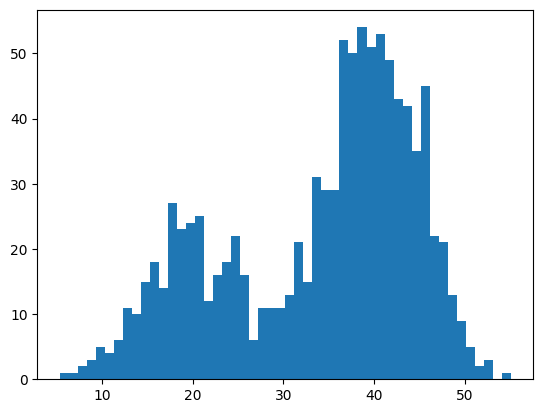

In [22]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [23]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [24]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [25]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

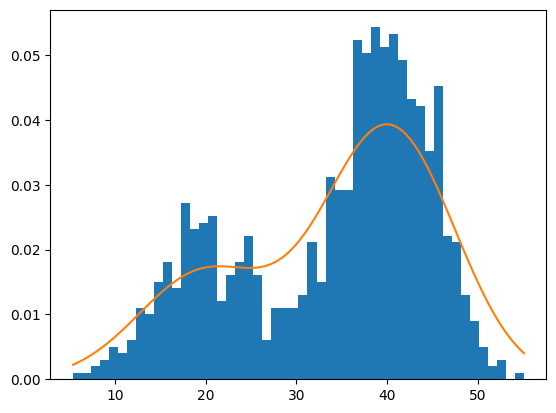

In [26]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

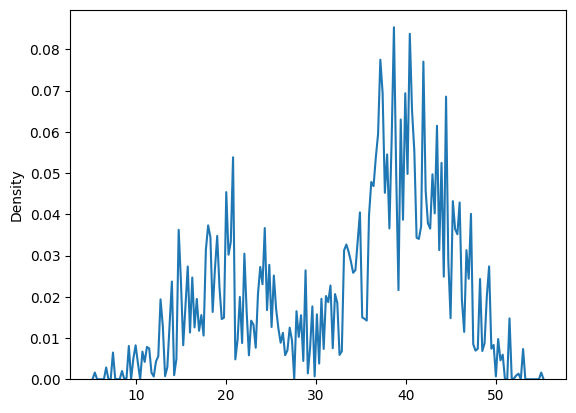

In [27]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [28]:
import seaborn as sns

In [29]:
df = sns.load_dataset('iris')

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

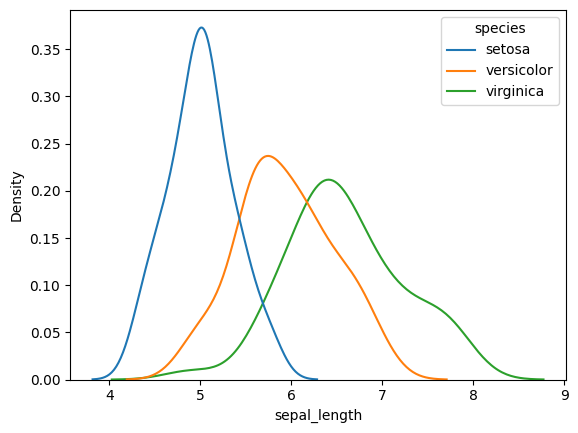

In [31]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

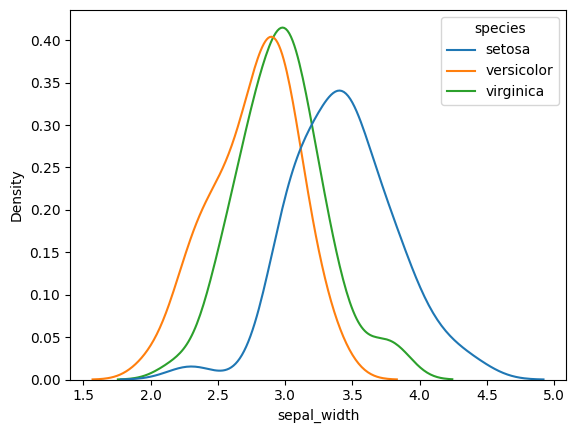

In [32]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

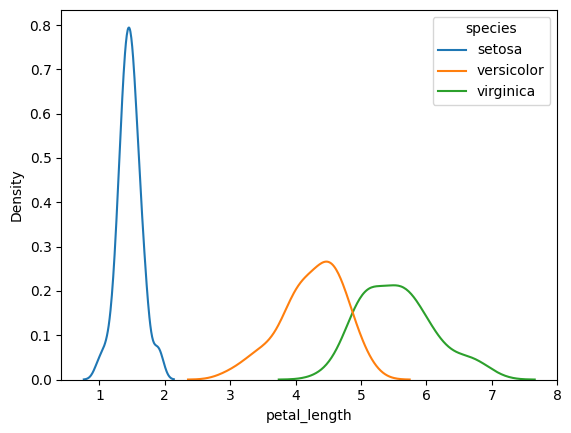

In [33]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

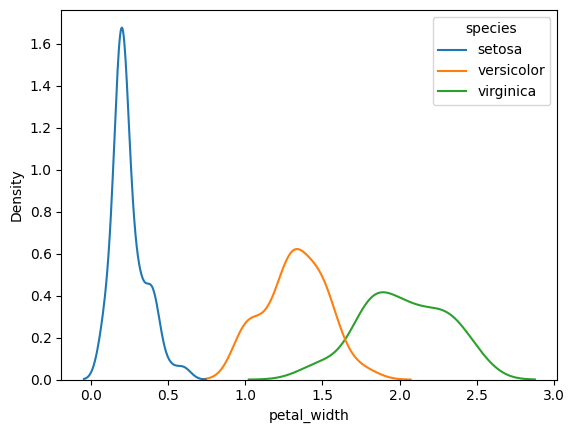

In [34]:
sns.kdeplot(data=df,x='petal_width',hue='species')

## Feature selection:
- We will choose feature that can easily disinteguish between the categories.
- So, here we will be choosing `petal_length` and `petal_width`.


<Axes: xlabel='petal_width', ylabel='Density'>

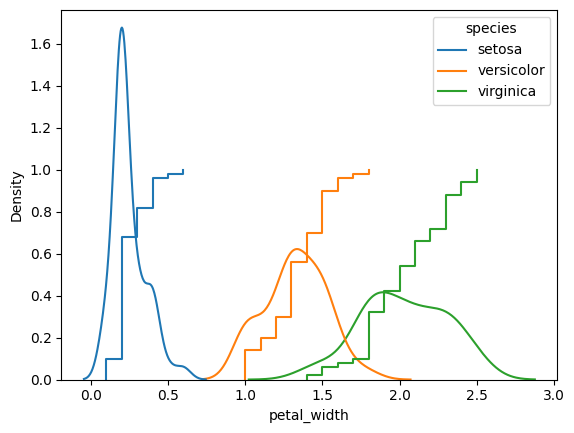

In [35]:
sns.kdeplot(data=df, x='petal_width', hue='species')
sns.ecdfplot(data=df, x='petal_width', hue='species')

In [36]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

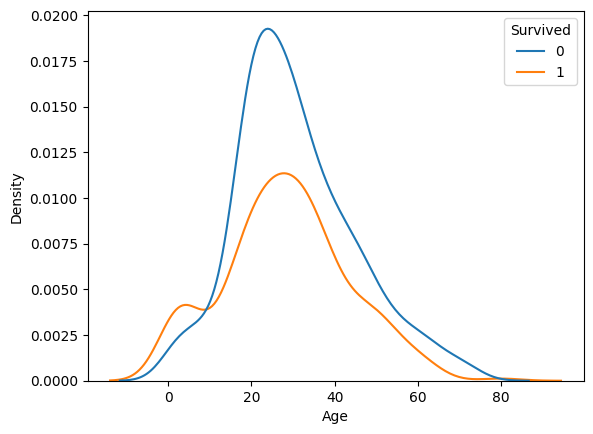

In [38]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

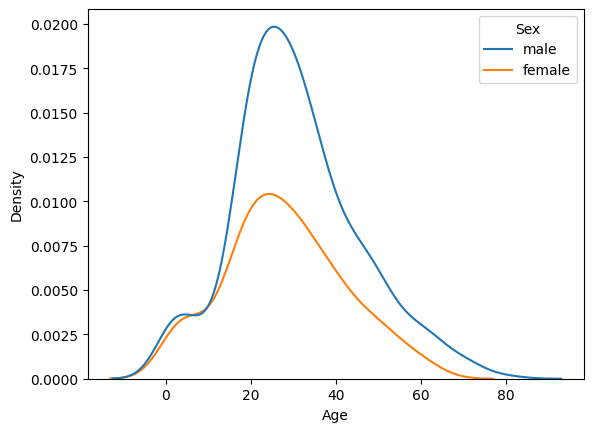

In [39]:
sns.kdeplot(data=titanic,x='Age',hue='Sex')

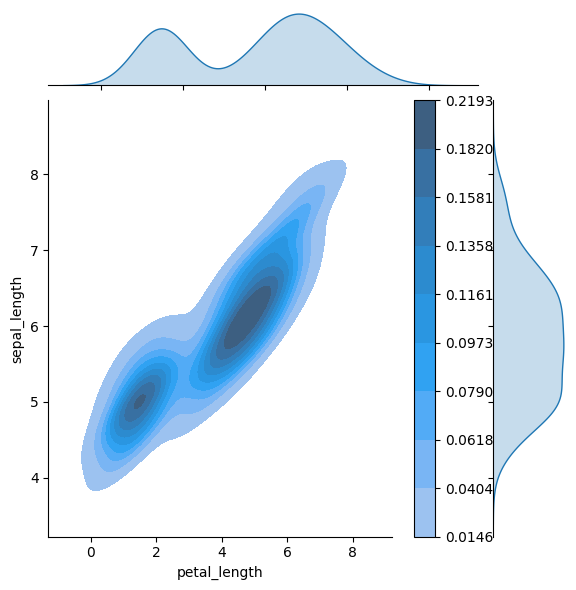

In [40]:
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

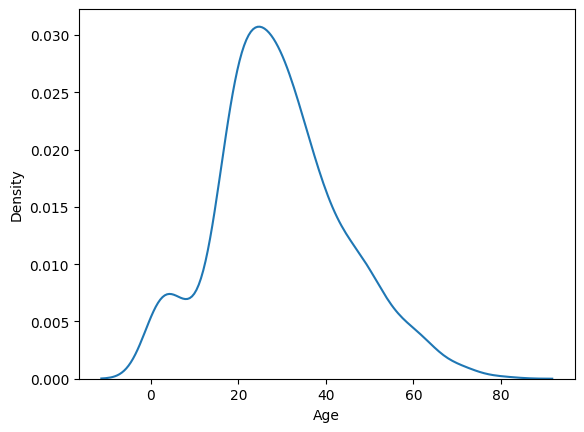

In [41]:
sns.kdeplot(titanic['Age'])

In [42]:
titanic['Age'].mean()

np.float64(29.69911764705882)

In [43]:
# Standardizing
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

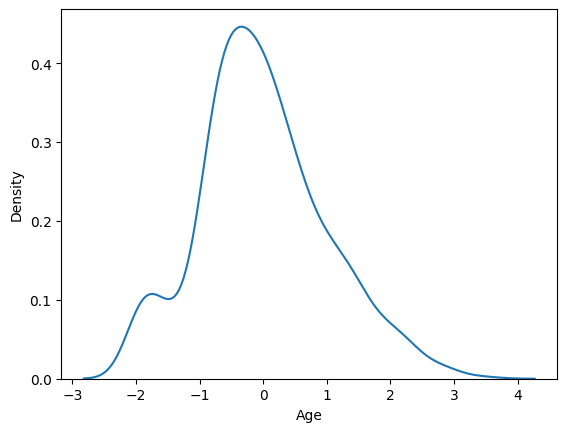

In [44]:
sns.kdeplot(x)

In [45]:
x.mean()

np.float64(2.388378943731429e-16)

In [46]:
x.std()

0.9999999999999994

In [47]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

In [48]:
# sd > 3 is considered outlier
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406095)

In [52]:
# sd < -3 is considered outlier
titanic['Age'].mean() - 3*titanic['Age'].std()

np.float64(-13.88037434994331)

In [53]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [54]:
titanic['Age'].max()

80.0